### Harvard GSD  J-Term 2121 
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 11-15/ 9:00 - 11:00 a.m. <br>
***

In [1]:
# import library
import numpy as np
import pandas as pd
import altair as alt
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Kernel Ridge Regression (KRR)

In [2]:
## Read your data
df = pd.read_csv('target.csv', sep=",", header=0)
refer = pd.read_csv('refer.csv', sep=",", header=0)

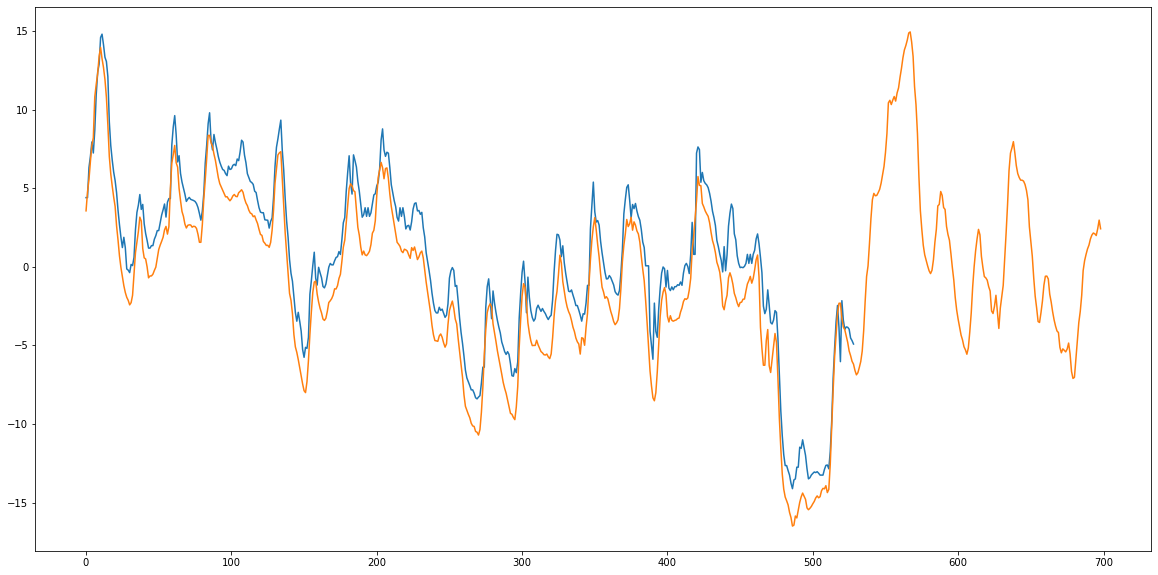

In [3]:
## Visualize your data
plt.figure(figsize=(20,10))
plt.plot(df["Temp"])
plt.plot(refer["Temp"])

In [4]:
## Set training data 
x_train = refer["Temp"][:529].to_numpy()
y_train = df["Temp"].to_numpy()

train_xy = pd.DataFrame({'x': x_train,'y': y_train})

In [5]:
## Fit your model 

from sklearn.kernel_ridge import KernelRidge

gamma = 5 
alpha = 0.199 
kernel = "polynomial" 
degree = 4 

reg = KernelRidge(alpha=alpha, kernel=kernel,gamma=gamma, degree=degree) # model (hyper)parameters
reg.fit(x_train.reshape(-1,1),y_train) # fit regressor
x_pred = refer["Temp"].to_numpy()
y_pred = reg.predict(x_pred.reshape(-1,1)) # predict values

pred_xy = pd.DataFrame({'x': x_pred,'y': y_pred})
pred_xy

,x,y
0,3.56,5.120985
1,4.76,6.216067
2,5.55,6.931898
3,6.70,7.966110
4,7.72,8.877550
...,...,...
694,2.10,3.777770
695,1.99,3.676106
696,2.42,4.073167
697,2.97,4.579577


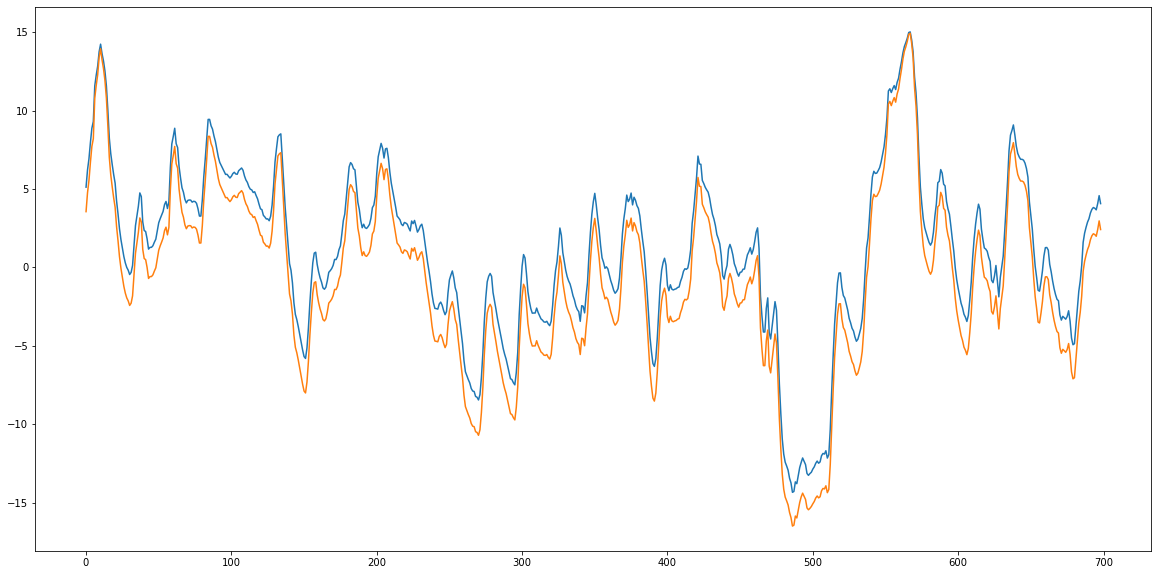

In [6]:
plt.figure(figsize=(20,10))
plt.plot(pred_xy["y"])
plt.plot(pred_xy["x"])

## RandomForest

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
n_estimators = 1 
max_depth = 2

reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth) # model (hyper)parameters
reg.fit(x_train.reshape(-1,1),y_train) # fit regressor
y_pred = reg.predict(x_pred.reshape(-1,1))

pred_xy = pd.DataFrame({'x': x_pred,'y': y_pred})


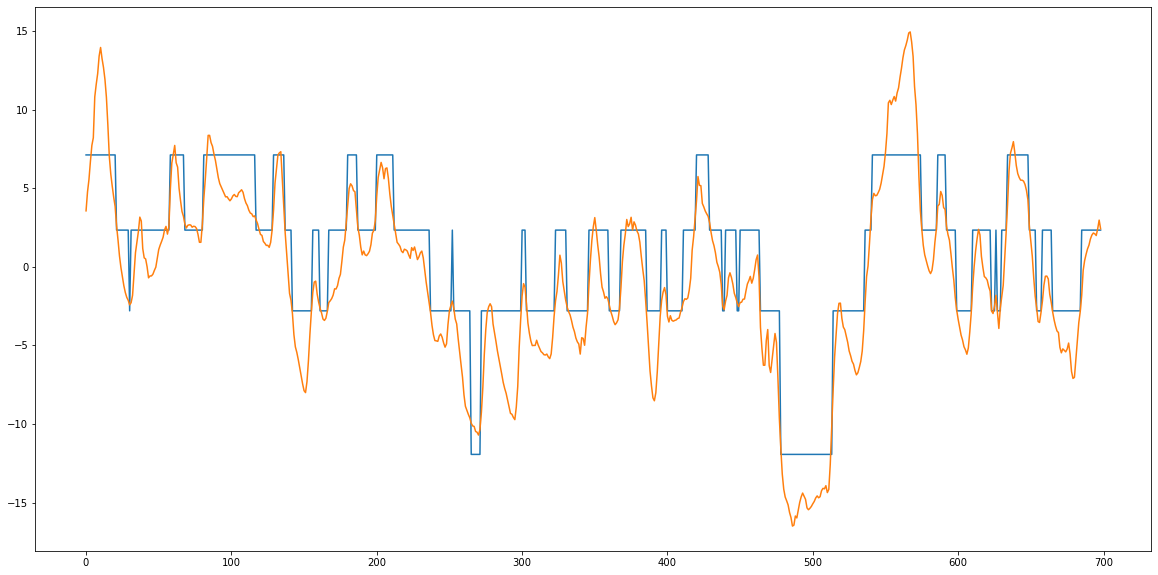

In [10]:
plt.figure(figsize=(20,10))
plt.plot(pred_xy["y"])
plt.plot(pred_xy["x"])

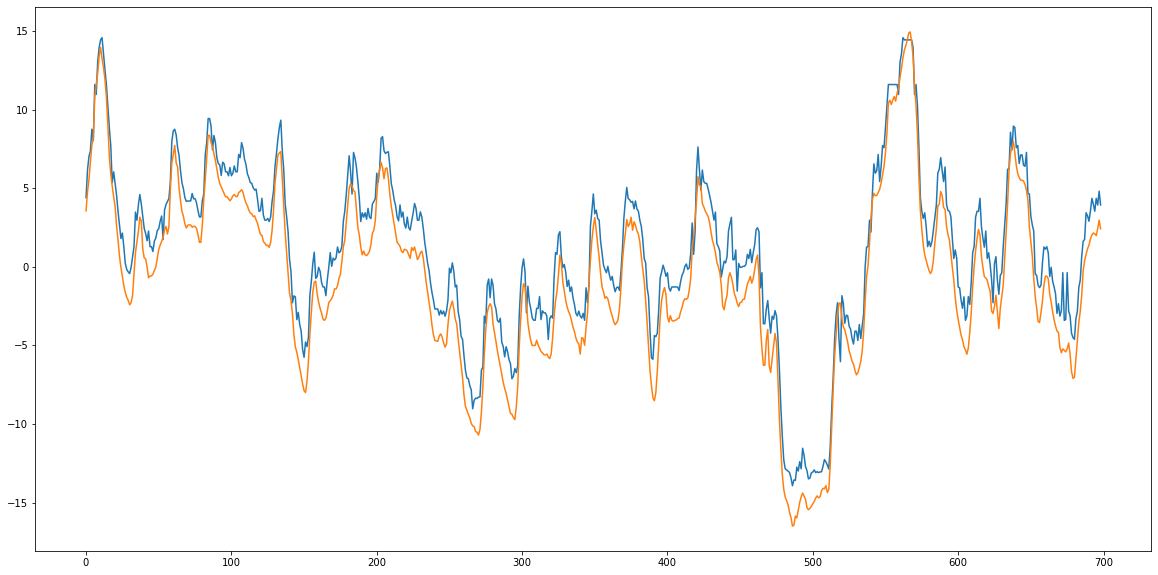

In [11]:
n_estimators = 3
max_depth = 12

reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth) # model (hyper)parameters
reg.fit(x_train.reshape(-1,1),y_train) # fit regressor
y_pred = reg.predict(x_pred.reshape(-1,1))

pred_xy = pd.DataFrame({'x': x_pred,'y': y_pred})

plt.figure(figsize=(20,10))
plt.plot(pred_xy["y"])
plt.plot(pred_xy["x"])


## Clustering

### K-means Clustering

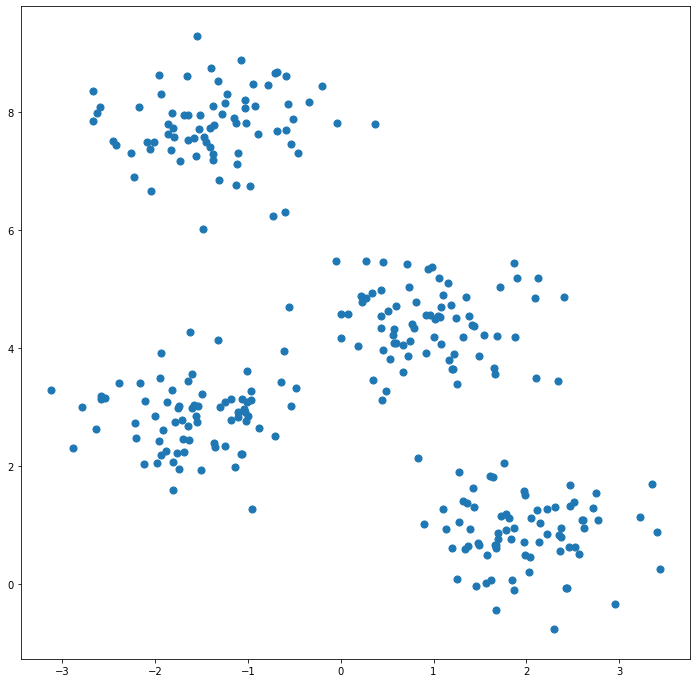

In [36]:
## Generate your sample datasets
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [37]:
## Your Code id here

## K-means Set model, fit a model and predict labels






In [38]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]
[1 2 0 2 1 1 3 0 2 2 3 2 0 2 1 0 0 1 3 3 1 1 0 3 3 0 1 0 3 0 2 2 0 2 2 2 2
 2 3 1 0 3 0 0 3 3 2 3 2 1 3 1 2 1 1 3 2 3 2 1 2 0 2 3 3 3 2 1 2 3 0 3 2 3
 3 2 3 0 1 2 1 0 1 1 2 0 1 0 2 2 0 1 2 3 3 0 1 1 0 3 2 1 2 1 0 1 1 0 2 0 3
 3 1 2 1 0 2 1 1 0 3 1 3 1 1 1 1 3 1 3 2 3 3 1 2 3 3 2 0 2 2 3 0 3 0 3 2 0
 2 2 2 0 2 0 1 3 2 3 1 0 2 0 0 1 0 3 3 0 1 0 0 2 1 0 3 2 1 1 0 3 1 0 3 3 0
 0 0 0 1 2 0 3 0 0 3 3 3 0 3 2 0 3 1 3 0 2 3 2 0 2 0 3 0 0 2 3 3 1 1 0 2 1
 1 3 1 3 0 2 2 0 0 2 0 1 3 0 1 3 2 3 1 0 1 2 2 2 2 3 3 2 0 3 1 0 3 3 3 1 1
 2 0 0 3 1 2 3 0 2 0 1 1 3 3 0 1 1 1 0 2 2 1 1 0 1 1 1 2 3 2 0 1 1 2 2 2 1
 1 0 2 3]


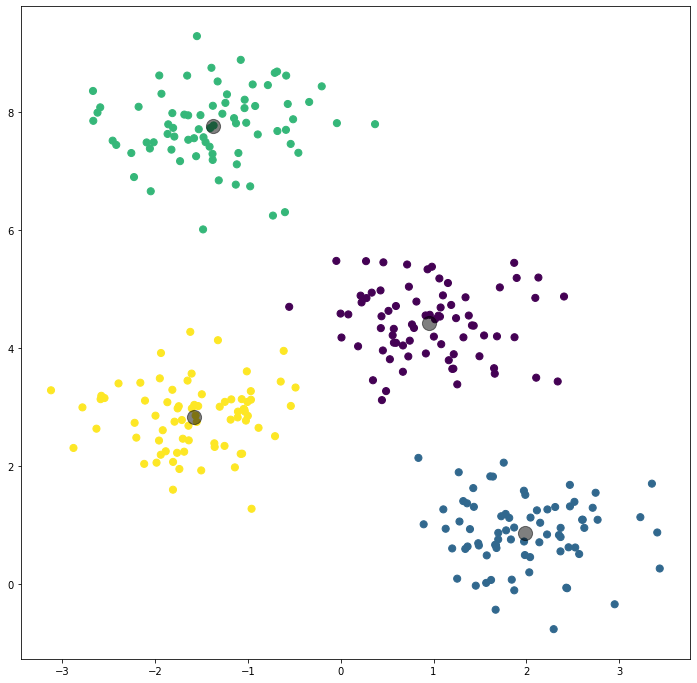

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### K-menas with non-linear boundaries

In [41]:
from sklearn.datasets import make_moons

## generate toy-data
X, y = make_moons(200, noise=.05, random_state=0)

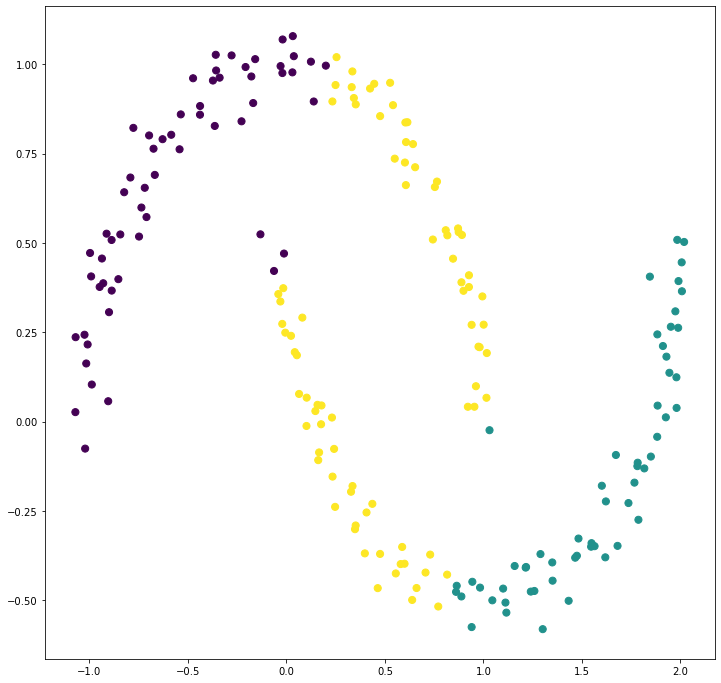

In [42]:
## Visualize K-means result
labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [46]:
from sklearn.metrics import accuracy_score

## your code here

## Test your model accuracy


0.56

### Support Vector Machine

In [47]:
from sklearn.svm import SVC # "Support vector classifier"

C=1E10


## your code here

## SVC Set model, fit a model and predict labels with "linear" kernel



In [48]:
accuracy_score(y, y_labels)

0.885

In [19]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

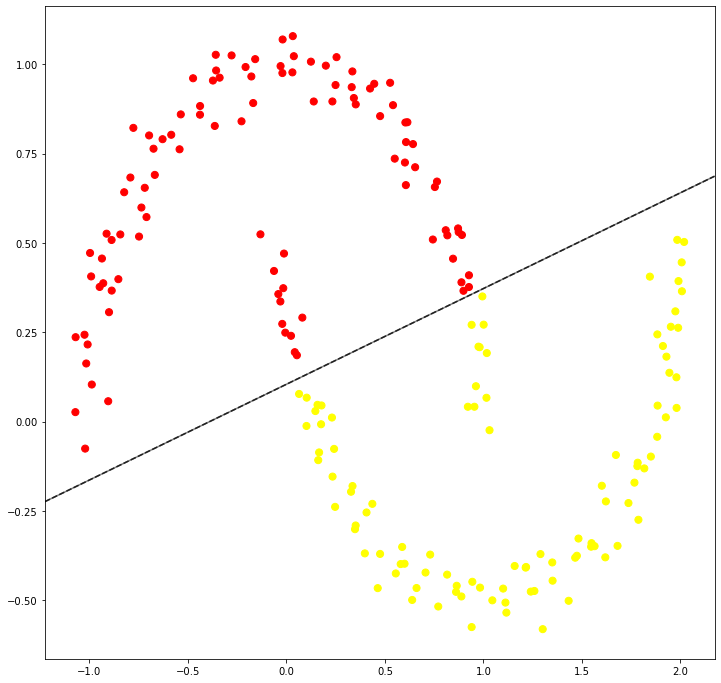

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y_labels, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [49]:
## Change kernel to radianl basis function

C=1E6


## your code here

## SVC Set model, fit a model and predict labels with "rbf" kernel



In [50]:
accuracy_score(y, y_pred)

1.0

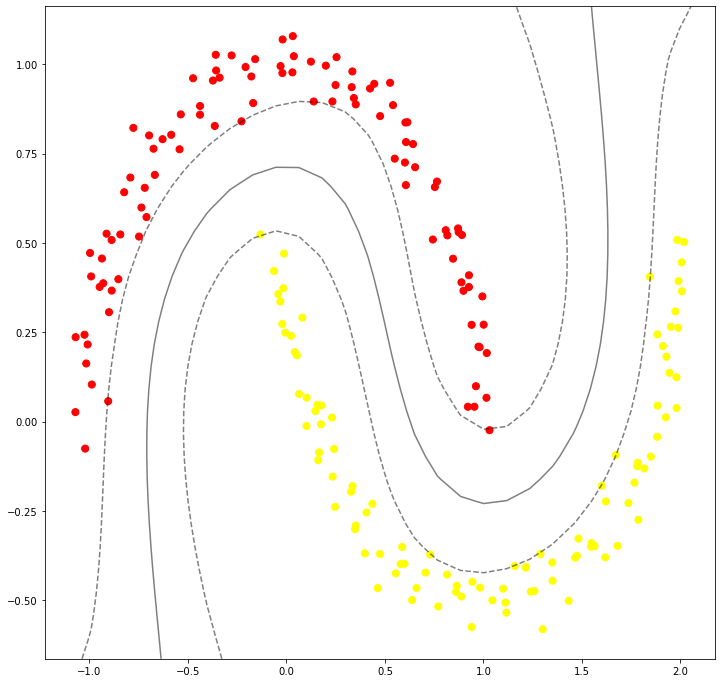

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Stayle Transfer Example

This tutorial uses deep learning to compose one image in the style of another image (ever wish you could paint like Picasso or Van Gogh?). This is known as neural style transfer and the technique is outlined in A Neural Algorithm of Artistic Style (Gatys et al.). ## https://arxiv.org/pdf/1508.06576.pdf

For a simple application of style transfer check out this tutorial to learn more about how to use the pretrained Arbitrary Image Stylization model from TensorFlow Hub or how to use a style transfer model with TensorFlow Lite. ## https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2
https://tfhub.dev/


Neural style transfer is an optimization technique used to take two images—a content image and a style reference image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image.

This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style reference image. These statistics are extracted from the images using a convolutional network.

### Import packages

In [23]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

Couldn't import dot_parser, loading of dot files will not be possible.


In [24]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [25]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

### Output visualization

In [26]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [27]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

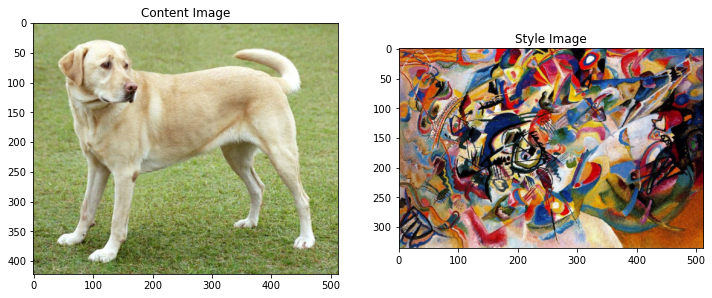

In [28]:
content_image = load_img(content_path)
style_image = load_img(style_path)


## Your code here
plt.subplot(1, 2, 1)

## Visualize Content image



plt.subplot(1, 2, 2)

## Visualize Style image



## Faster style transfer learning

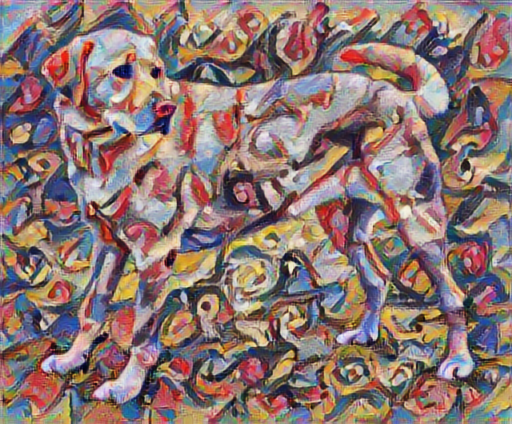

In [55]:
import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Your code here 

## Create your Stylized image


tensor_to_image(stylized_image)